In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [46]:
f = open("..\\code\\whatsthis.pickle", "rb")
unit = pickle.load(f)
f.close()
unit

{'shgo':      fun: 0.30000000000000004
     funl: array([0.3])
  message: 'Optimization terminated successfully.'
     nfev: 13
      nit: 2
    nlfev: 4
    nlhev: 0
    nljev: 1
  success: True
        x: array([1.3       , 0.5       , 0.62831853])
       xl: array([[1.3       , 0.5       , 0.62831853]])}

In [6]:
data_path = '..\\code\\results\\'
#data_df_tir_a = pd.read_csv(data_path + "results_1000_jpl_tir_a_fine.csv")
#data_df_vis_a = pd.read_csv(data_path + "results_1000_granvik_vis_a_coarse.csv")
data_df_speed = pd.read_csv(data_path + "results_1000_jpl_a_speed.csv")

In [7]:
data_df_speed.head()

,Unnamed: 0,n,a,e,completeness,aspeed,spread
0,0,1.0,0.2,0.0,0.533,0.2,0.2
1,1,2.0,0.2,0.0,0.599,0.2,0.2
2,2,3.0,0.2,0.0,0.634,0.2,0.2
3,3,4.0,0.2,0.0,0.647,0.2,0.2
4,4,5.0,0.2,0.0,0.656,0.2,0.2


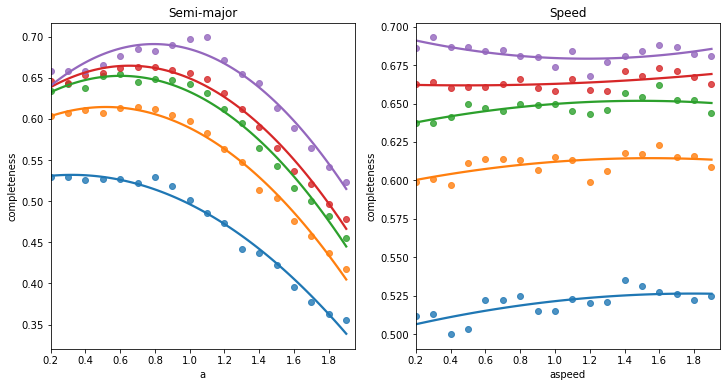

In [24]:
# Number of Satellites
fig_n, axes_n = plt.subplots(1, 2, figsize=(12, 6))
for i in range(2):
    axes_n[i].set_xlim((0.2, 1.95))
        
axes_n[0].set_title('Semi-major')
axes_n[1].set_title('Speed')
data_df_speed_a = data_df_speed.loc[data_df_speed['aspeed'] > 0.65].loc[data_df_speed['aspeed'] < 0.75]
data_df_speed_s = data_df_speed.loc[data_df_speed['a'] > 0.65].loc[data_df_speed['a'] < 0.75]

for i in range(1, int(max(data_df_speed['n']))+1):
    sns.regplot(data=data_df_speed_a.loc[data_df_speed_a['n'] == i], x='a', y='completeness', ax=axes_n[0], order=2, label=f"{i} sats", ci=0)
    sns.regplot(data=data_df_speed_s.loc[data_df_speed_s['n'] == i], x='aspeed', y='completeness', ax=axes_n[1], order=2, label=f"{i} sats", ci=0)

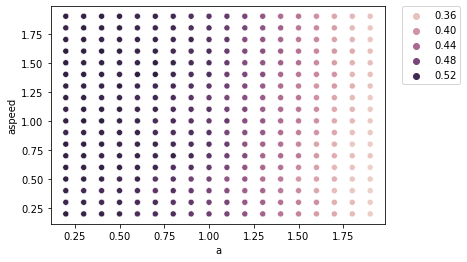

In [31]:
axes = sns.scatterplot(data=data_df_speed.loc[data_df_speed['n'] == 1], x='a', y='aspeed', hue='completeness')
axes.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [34]:
data_df_speed[['a', 'aspeed', 'completeness']].cov()

,a,aspeed,completeness
a,1.000000e+00,1.924845e-16,-0.618083
aspeed,1.924845e-16,1.000000e+00,0.028363
completeness,-6.180827e-01,2.836325e-02,1.000000


In [ ]:
sns.lmplot(data=data_df_tir_a, x='a', y='completeness', hue='n', order=2, ci=1, height=7, palette="deep", markers='1')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
sns.lmplot(data=data_df_vis_a, x='a', y='completeness', hue='n', order=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [4]:
g = sns.barplot(data=data_df_tir_a.groupby('n').mean().reset_index(), x='n', y='completeness', palette="Blues_d")
g.set_ylim(0.4, 0.7)

NameError: name 'data_df_tir_a' is not defined

In [5]:
data_df_tir_ns = pd.read_csv(data_path + "results_1000_jpl_tir_ns.csv")
data_df_tir_ns.head()

FileNotFoundError: [Errno 2] No such file or directory: '..\\code\\results\\results_1000_jpl_tir_ns.csv'

In [37]:
data_df_tir_ns_grouped = data_df_tir_ns.groupby(['n', 'spread']).max('completeness').reset_index()
data_df_tir_ns_grouped = data_df_tir_ns_grouped[data_df_tir_ns_grouped['n'] < 6]

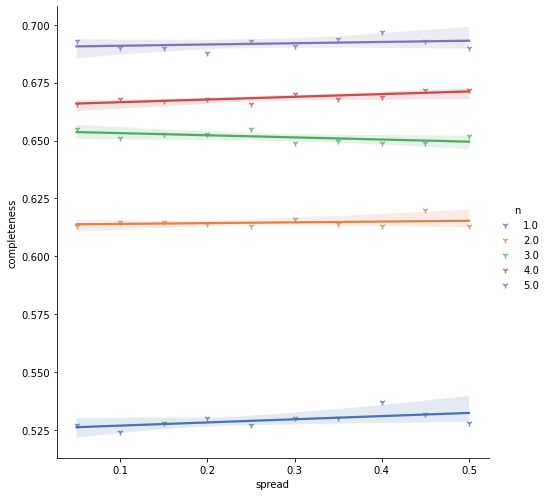

In [38]:
sns.lmplot(data=data_df_tir_ns_grouped, x='spread', y='completeness', hue='n', order=1, ci=99, height=7, palette="deep", markers='1')

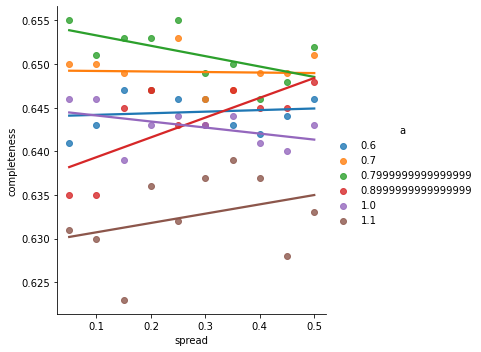

In [46]:
sns.lmplot(data=data_df_tir_ns[data_df_tir_ns['n'] == 3], x='spread', y='completeness', hue='a', ci=0)

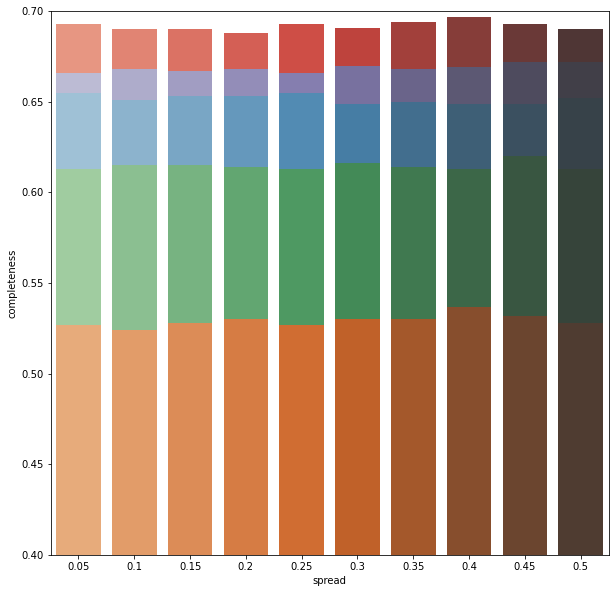

In [61]:
plt.figure(figsize=(10,10))
plt.ylim((0.4, 0.7))
for i in range(5):
    pal = ['Reds_d', 'Purples_d', 'Blues_d', 'Greens_d', 'Oranges_d'][i]
    sns.barplot(data=data_df_tir_ns[data_df_tir_ns['n'] == 5-i].groupby('spread').max().reset_index(), x='spread', y='completeness', palette=pal)